## Importing the Necessary Libraries

In [1]:
# Dataframe Manipulation and Analysis Libraries

import pandas as pd
import numpy as np

# Data Visualization Libraries

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns 

# Library to Filter Warnings

import warnings
warnings.filterwarnings('ignore')

# Multi-Collinearity Test Package
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Data Preparation Libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV

# Machine Learning Models
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor

# Feature Decomposition Library
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE

# Model Evaluation Libraries
from sklearn.metrics import r2_score,mean_squared_error

# Clustering Library
from sklearn.cluster import KMeans

# Learning Curve Analysis Library
from sklearn.model_selection import learning_curve


## Problem Statement :- 

* Build a Machine Learning model which can predict amount spent by the policy taker to the utmost accuracy.

## Loading the Dataframes

In [5]:
personal_details = pd.read_excel("Medibuddy insurance data personal details (1) (2).xlsx")
official_details = pd.read_csv("Medibuddy Insurance Data Price (1) (2).csv")

In [6]:
personal_details.head()

,Policy no.,children,smoker,region
0,PLC157006,0,no,southwest
1,PLC157033,1,no,southwest
2,PLC157060,0,no,southwest
3,PLC157087,1,no,southwest
4,PLC157186,5,no,southwest


In [7]:
official_details.head()

,Policy no.,age,sex,bmi,charges in INR
0,PLC156898,19,female,27.900,16884.92400
1,PLC156907,18,male,33.770,1725.55230
2,PLC156916,28,male,33.000,4449.46200
3,PLC156925,33,male,22.705,21984.47061
4,PLC156934,32,male,28.880,3866.85520


### Merging two given tables

In [8]:
merged_details = pd.merge(official_details,personal_details)

In [9]:
merged_details

,Policy no.,age,sex,bmi,charges in INR,children,smoker,region
0,PLC156898,19,female,27.900,16884.92400,0,yes,southwest
1,PLC156907,18,male,33.770,1725.55230,1,no,southeast
2,PLC156916,28,male,33.000,4449.46200,3,no,southeast
3,PLC156925,33,male,22.705,21984.47061,0,no,northwest
4,PLC156934,32,male,28.880,3866.85520,0,no,northwest
...,...,...,...,...,...,...,...,...
1333,PLC168895,50,male,30.970,10600.54830,3,no,northwest
1334,PLC168904,18,female,31.920,2205.98080,0,no,northeast
1335,PLC168913,18,female,36.850,1629.83350,0,no,southeast
1336,PLC168922,21,female,25.800,2007.94500,0,no,southwest


## EDA(Exploratory Data Analysis)

In [10]:
merged_details.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Policy no.      1338 non-null   object 
 1   age             1338 non-null   int64  
 2   sex             1338 non-null   object 
 3   bmi             1338 non-null   float64
 4   charges in INR  1338 non-null   float64
 5   children        1338 non-null   int64  
 6   smoker          1338 non-null   object 
 7   region          1338 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 94.1+ KB


#### Analysis :
1. There are 1338 rows in the dataset.
2. There are 8 features.
3. There is no null record present in the dataset.
4. Age,Bmi,Charges in INR,Children are numeric in nature while Policy no.,Sex,Smoker and Region are of string(object) type.

### Dropping Policy Number

In [11]:
merged_details.drop('Policy no.',axis = 1,inplace = True)

In [12]:
merged_details

,age,sex,bmi,charges in INR,children,smoker,region
0,19,female,27.900,16884.92400,0,yes,southwest
1,18,male,33.770,1725.55230,1,no,southeast
2,28,male,33.000,4449.46200,3,no,southeast
3,33,male,22.705,21984.47061,0,no,northwest
4,32,male,28.880,3866.85520,0,no,northwest
...,...,...,...,...,...,...,...
1333,50,male,30.970,10600.54830,3,no,northwest
1334,18,female,31.920,2205.98080,0,no,northeast
1335,18,female,36.850,1629.83350,0,no,southeast
1336,21,female,25.800,2007.94500,0,no,southwest


### Encoding sex,smoker and region feature as they are categorical variable.
- We will be doing label encoding with sex and smoker features and one hot encoding with region feature.

In [13]:
merged_details['sex'] = merged_details['sex'].replace({'female':0,'male':1})
merged_details['smoker'] = merged_details['smoker'].replace({'no':0,'yes':1})
merged_details = pd.get_dummies(merged_details,columns = ['region'])

In [14]:
merged_details

,age,sex,bmi,charges in INR,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,16884.92400,0,1,0,0,0,1
1,18,1,33.770,1725.55230,1,0,0,0,1,0
2,28,1,33.000,4449.46200,3,0,0,0,1,0
3,33,1,22.705,21984.47061,0,0,0,1,0,0
4,32,1,28.880,3866.85520,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,10600.54830,3,0,0,1,0,0
1334,18,0,31.920,2205.98080,0,0,1,0,0,0
1335,18,0,36.850,1629.83350,0,0,0,0,1,0
1336,21,0,25.800,2007.94500,0,0,0,0,0,1


In [59]:
merged_details.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1338 entries, 0 to 1337
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   int64  
 1   sex               1338 non-null   int64  
 2   bmi               1338 non-null   float64
 3   charges in INR    1338 non-null   float64
 4   children          1338 non-null   int64  
 5   smoker            1338 non-null   int64  
 6   region_northeast  1338 non-null   uint8  
 7   region_northwest  1338 non-null   uint8  
 8   region_southeast  1338 non-null   uint8  
 9   region_southwest  1338 non-null   uint8  
dtypes: float64(2), int64(4), uint8(4)
memory usage: 110.7 KB


### Descriptive Analysis

In [16]:
merged_details.describe()

,age,sex,bmi,charges in INR,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,13270.422265,1.094918,0.204783,0.242152,0.242900,0.272048,0.242900
std,14.049960,0.500160,6.098187,12110.011237,1.205493,0.403694,0.428546,0.428995,0.445181,0.428995
min,18.000000,0.000000,15.960000,1121.873900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,0.000000,26.296250,4740.287150,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,39.000000,1.000000,30.400000,9382.033000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,51.000000,1.000000,34.693750,16639.912515,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,64.000000,1.000000,53.130000,63770.428010,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Observations :-
- Charges in INR tends to have outliers as its median and mean is not close to each other.

In [17]:
merged_details.kurtosis

<bound method NDFrame._add_numeric_operations.<locals>.kurt of       age  sex     bmi  charges in INR  children  smoker  region_northeast  \
0      19    0  27.900     16884.92400         0       1                 0   
1      18    1  33.770      1725.55230         1       0                 0   
2      28    1  33.000      4449.46200         3       0                 0   
3      33    1  22.705     21984.47061         0       0                 0   
4      32    1  28.880      3866.85520         0       0                 0   
...   ...  ...     ...             ...       ...     ...               ...   
1333   50    1  30.970     10600.54830         3       0                 0   
1334   18    0  31.920      2205.98080         0       0                 1   
1335   18    0  36.850      1629.83350         0       0                 0   
1336   21    0  25.800      2007.94500         0       0                 0   
1337   61    0  29.070     29141.36030         0       1                 0   



In [18]:
merged_details.skew

<bound method NDFrame._add_numeric_operations.<locals>.skew of       age  sex     bmi  charges in INR  children  smoker  region_northeast  \
0      19    0  27.900     16884.92400         0       1                 0   
1      18    1  33.770      1725.55230         1       0                 0   
2      28    1  33.000      4449.46200         3       0                 0   
3      33    1  22.705     21984.47061         0       0                 0   
4      32    1  28.880      3866.85520         0       0                 0   
...   ...  ...     ...             ...       ...     ...               ...   
1333   50    1  30.970     10600.54830         3       0                 0   
1334   18    0  31.920      2205.98080         0       0                 1   
1335   18    0  36.850      1629.83350         0       0                 0   
1336   21    0  25.800      2007.94500         0       0                 0   
1337   61    0  29.070     29141.36030         0       1                 0   



### Building a Custom Summary Function for in-depth EDA report

In [19]:
def custom_summary(mydf):
    cols = []
    for i in merged_details.columns:
        if mydf[i].dtype != object:
            cols.append(i)
            
    results = pd.DataFrame(columns = cols,index = ['Datatype','Count','Min','Q1','Q2','Q3','Max','Mean','STD DEV','Skew','Kurt','Range','IQR','Skew_Comment','Kurt_Comment','Outlier_Comment'])              
    for i in results.columns:
        results.loc['Datatype',i] = mydf[i].dtype
        results.loc['Count',i] = mydf[i].count()
        results.loc['Min',i] = mydf[i].min()
        results.loc['Q1',i] = mydf[i].quantile(0.25)
        results.loc['Q2',i] = mydf[i].quantile(0.50)
        results.loc['Q3',i] = mydf[i].quantile(0.75)
        results.loc['Max',i] = mydf[i].max()
        results.loc['Mean',i] = round(mydf[i].mean(),2)
        results.loc['STD DEV',i] = round(mydf[i].std(),2)
        results.loc['Skew',i] = round(mydf[i].skew(),2)
        results.loc['Kurt',i] = round(mydf[i].kurt(),2)
        results.loc['Range',i] = mydf[i].max() - mydf[i].min()
        results.loc['IQR',i] = mydf[i].quantile(0.75) - mydf[i].quantile(0.25)
        
        # Adding comments for Skewness
        
        if results.loc['Skew',i] <= -1:
            sk_label = 'Highly Negatively Skewed'
        elif -1 < results.loc['Skew',i] <= -0.50:
            sk_label = 'Moderately Negatively Skewed'
        elif -0.50 < results.loc['Skew',i] <= 0:
            sk_label = 'Approximately Normally Distributed(-ive)'
        elif 0 < results.loc['Skew',i] <= 0.5:
            sk_label = 'Approximately Normally Distributed(+ive)'
        elif 0.5 < results.loc['Skew',i] <= 1:
            sk_label = 'Moderately Positively Skewed'   
        elif results.loc['Skew',i] >= 1:
            sk_label = 'Highly Positively Skewed'       
        else:
            sk_label = 'Error'
        results.loc['Skew_Comment',i] = sk_label  
        
        # Adding comments for Kurtosis
        
        if results.loc['Kurt',i] <= -1:
            ku_label = 'Highly Platykurtic'
        elif -1 < results.loc['Kurt',i] <= -0.50:
            ku_label = 'Moderately Platykurtic'    
        elif -0.50 < results.loc['Kurt',i] <= 0.5:
            ku_label = 'Mesokurtic'
        elif 0.5 < results.loc['Skew',i] <= 1:
            ku_label = 'Moderately Leptokurtic'   
        elif results.loc['Skew',i] >= 1:
            ku_label = 'Highly Leptokurtic'       
        else:
            ku_label = 'Error'
        results.loc['Kurt_Comment',i] = ku_label  
        
        # Adding comments for Outliers
        
        lw = results.loc['Q1',i] - (1.5 * results.loc['IQR',i])
        uw = results.loc['Q3',i] + (1.5 * results.loc['IQR',i])
        
        if len([x for x in mydf[i] if x < lw or x > uw]) > 0:
            outlier_label = 'Have Outliers'
        else:
            outlier_label = 'No Outliers'
        results.loc['Outlier_Comment',i] = outlier_label
    return results

In [20]:
custom_summary(merged_details)

,age,sex,bmi,charges in INR,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
Datatype,int64,int64,float64,float64,int64,int64,uint8,uint8,uint8,uint8
Count,1338,1338,1338,1338,1338,1338,1338,1338,1338,1338
Min,18,0,15.96,1121.8739,0,0,0,0,0,0
Q1,27.0,0.0,26.29625,4740.28715,0.0,0.0,0.0,0.0,0.0,0.0
Q2,39.0,1.0,30.4,9382.033,1.0,0.0,0.0,0.0,0.0,0.0
Q3,51.0,1.0,34.69375,16639.912515,2.0,0.0,0.0,0.0,1.0,0.0
Max,64,1,53.13,63770.42801,5,1,1,1,1,1
Mean,39.21,0.51,30.66,13270.42,1.09,0.2,0.24,0.24,0.27,0.24
STD DEV,14.05,0.5,6.1,12110.01,1.21,0.4,0.43,0.43,0.45,0.43
Skew,0.06,-0.02,0.28,1.52,0.94,1.46,1.21,1.2,1.03,1.2


#### Analysis :
- We have outliers in Bmi,Charges in INR,Smoker,Region_northeast,Region_northwest and Region_southwest.

### Outlier Detection and Treatment
- We are treating only bmi column for outliers as other features that has outliers contains 0 and 1 only.

In [21]:
main_details = merged_details[['bmi','charges in INR']]

In [22]:
main_details

,bmi,charges in INR
0,27.900,16884.92400
1,33.770,1725.55230
2,33.000,4449.46200
3,22.705,21984.47061
4,28.880,3866.85520
...,...,...
1333,30.970,10600.54830
1334,31.920,2205.98080
1335,36.850,1629.83350
1336,25.800,2007.94500


In [23]:
# Replacing outliers
def replace_outlier(mydf,col,method = 'Quartile',strategy = 'median'): 
    if method == 'Quartile':
        Q1 = mydf[col].quantile(0.25)
        Q2 = mydf[col].quantile(0.50)
        Q3 = mydf[col].quantile(0.75)
        IQR = Q3 - Q1
        LW = Q1 - 1.5 * IQR
        UW = Q3 + 1.5 * IQR
        
    elif method == 'Standard Deviation':
        mean = mydf[col].mean()
        std_dev = mydf[col].std()
        LW = mean - (2 * std_dev)
        UW = mean - (2 * std_dev)
    else:
        print('Pass a Correct Method')
        
    # Printing all the Outliers
    outliers = mydf.loc[(mydf[col] < LW) | (mydf[col] > UW),col]
    outliers_density = round(len(outliers) / len(mydf),2)
    
    if len(outliers) == 0:
        print(f'Feature {col} does not have any Outliers')
    else:
        print(f'Feature {col} have Outliers')
        print(f'Total Number of Outliers in {col} is {len(outliers)}')
        print(f'Outlier Percentage in {col} is {outliers_density *  100} %')
        
    if strategy == 'median':
        mydf.loc[(mydf[col] < LW),col] = Q1
        mydf.loc[(mydf[col] > UW),col] = Q3
    elif strategy == 'mean':    
        mydf.loc[(mydf[col] < LW),col] = mean
        mydf.loc[(mydf[col] > UW),col] = mean
    else:
        print('Pass the Correct Strategy')             
        
    return mydf

In [24]:
def odt_plots(mydf,col):
    f,(ax1,ax2) = plt.subplots(1,2,figsize = (25,8)) 
    # Descriptive statistics Box Plot
    sns.boxplot(mydf[col],ax = ax1)
    ax1.set_title(col + ' Box Plot')
    ax1.set_xlabel('Values')
    ax1.set_ylabel('Box Plot')
    
    # Replacing the outliers
    mydf_out = replace_outlier(mydf,col)
    # Plotting box plot without outliers
    sns.boxplot(mydf_out[col],ax = ax2)
    ax1.set_title(col + ' Box Plot')
    ax1.set_xlabel('Values')
    ax1.set_ylabel('Box Plot')
    plt.show()

Feature bmi have Outliers
Total Number of Outliers in bmi is 9
Outlier Percentage in bmi is 1.0 %


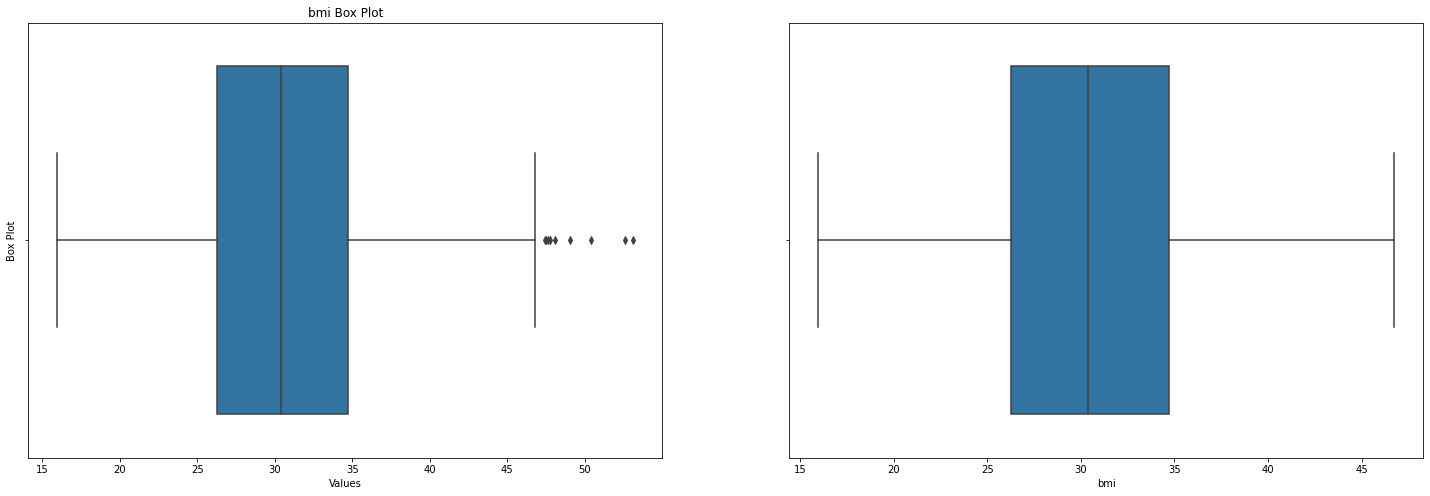

In [25]:
for col in merged_details.drop(['charges in INR','age','sex','children','smoker','region_northeast','region_northwest','region_southeast','region_southwest'],axis = 1).columns :
    odt_plots(merged_details,col)                              

### Multivariate Analysis using Regression

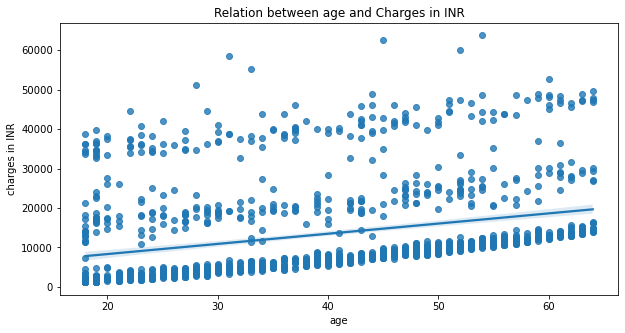

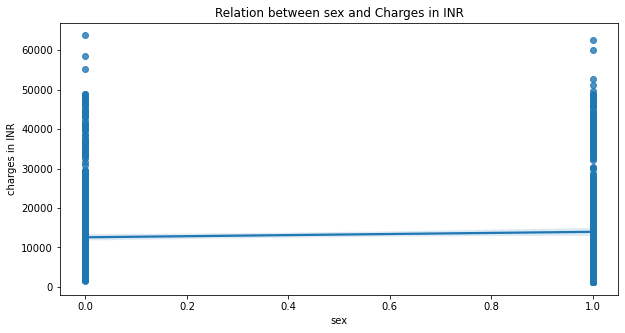

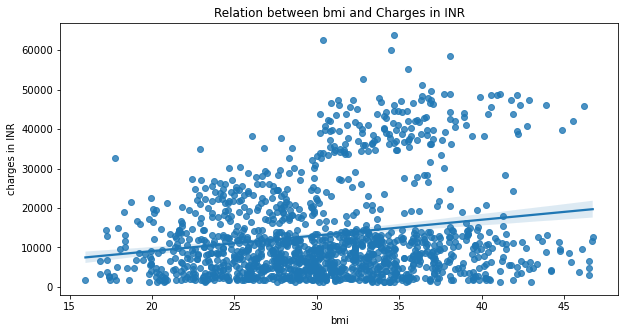

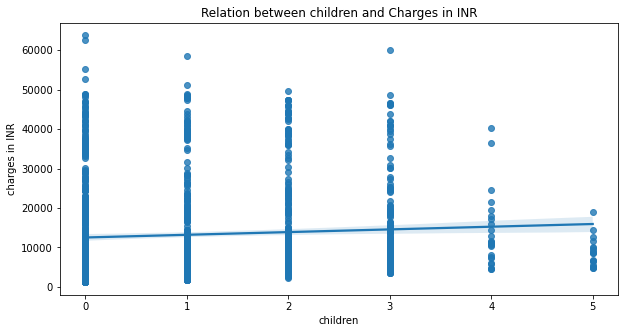

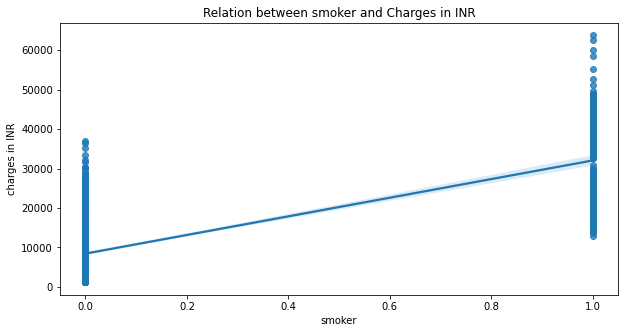

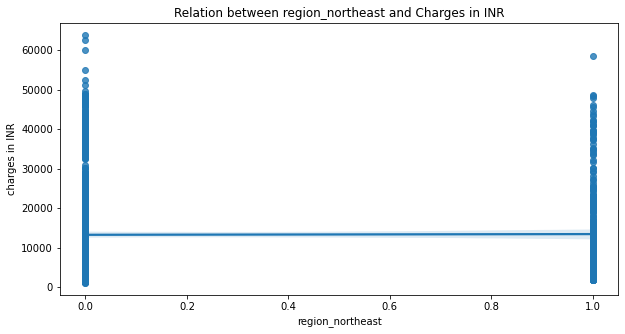

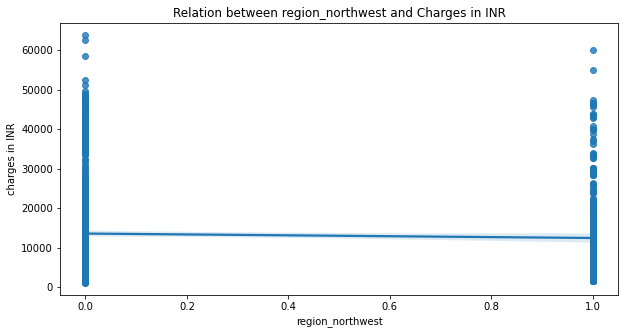

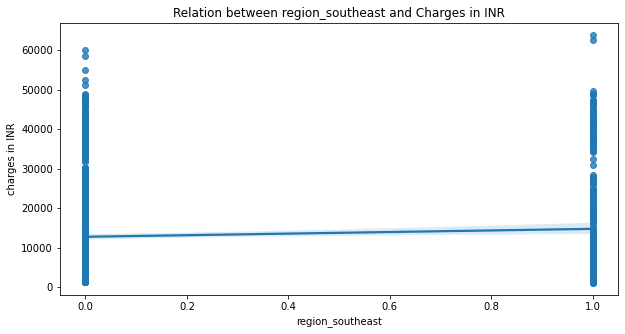

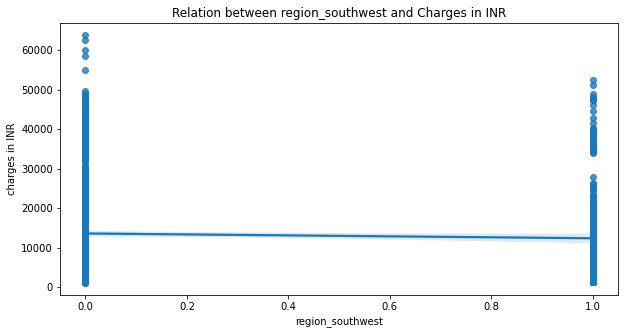

In [26]:
for col in merged_details.columns:
    if col != 'charges in INR':
        fig,ax1 = plt.subplots(figsize = (10,5))
        sns.regplot(x = merged_details[col] , y = merged_details['charges in INR'],ax = ax1).set_title(f'Relation between {col} and Charges in INR')

#### Analysis:
- Charges in INR and Age has a Mild Positive Correlation.
- Charges in INR and Sex has no Correlation.
- Charges in INR and Bmi has a Mild Positive Correlation.
- Charges in INR and Children has a very Mild Positive Correlation.
- Charges in INR and Region_NorthEast has a very Mild Negative Correlation.
- Charges in INR and Region_NorthWest has a very Mild Negative Correlation.
- Charges in INR and Region_SothEast has a very Mild Positive Correlation.
- Charges in INR and Region_SouthWest has a very Mild Negative Correlation.

### Multicollinearity Check
- Stage 1 - Collinearity HeatMap

<AxesSubplot:>

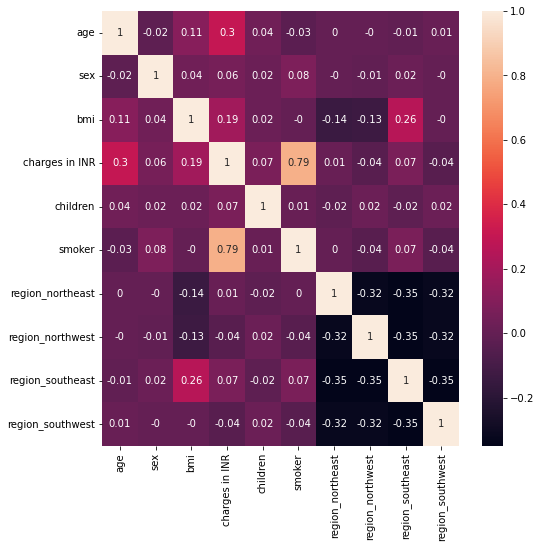

In [27]:
corr = round(merged_details.corr(),2)
f,ax = plt.subplots(figsize = (8,8))
sns.heatmap(corr,annot = True)

#### Analysis :
- Independent Variables pairs with Correlation greater than 30 %(greater than 0.3 and smaller than -0.3)
1. Region_NorthEast and Region_NorthWest  
2. Region_NorthEast and Region_SouthEast
3. Region_SouthEast and Region_NorthWest
4. Region_NorthEast and Region_SouthWest
5. Region_SouthEast and Region_SouthWest
6. Region_NorthWest and Region_SouthWest

Few independent features have collinearity greater than 30 % which indicates that there is a chance of multi-collinearity. 


### Multicollinearity Check
- Stage 2 - Variance Inflating Factor (VIF)

    Formula for VIF = 1/(1-R2)

    1. Regress every independent variable with each other and find the R2 score.
    2. Find out VIF using above formula.
    3. If VIF is more than 5 for any independent variable, we can conclude that Multi-Collinearity exists.

In [28]:
def VIF(independent_variable):
    vif = pd.DataFrame()
    vif['VIF'] = [variance_inflation_factor(independent_variable.values,i) for i in range(independent_variable.shape[1])]
    vif['Independent Variable'] = independent_variable.columns
    return vif.sort_values(by = 'VIF',ascending = False)

In [29]:
VIF(merged_details.drop('charges in INR',axis = 1))

,VIF,Independent Variable
7,11.858856,region_southeast
8,9.552311,region_southwest
6,8.954050,region_northwest
5,8.903818,region_northeast
2,1.101009,bmi
0,1.017887,age
4,1.012210,smoker
1,1.008462,sex
3,1.004111,children


#### Analysis :
- Region_NorthEast,Region_NorthWest,Region_SouthEast and Region_SouthWest have VIF score greater than 5 , so we can conclude that Multi-Collinearity exists.

### Correlation with Target Feature

In [30]:
def CWT(data,tcol):
    independent_variables = data.drop(tcol,axis = 1).columns
    corr_result = []
    for col in independent_variables:
        corr_result.append(data[tcol].corr(data[col]))
    result = pd.DataFrame([independent_variables,corr_result],index = ['Independent Variable','Correlation']).T
    return result.sort_values(by = 'Correlation',ascending = False)

In [31]:
CWT(merged_details,'charges in INR')

,Independent Variable,Correlation
4,smoker,0.787251
0,age,0.299008
2,bmi,0.193789
7,region_southeast,0.073982
3,children,0.067998
1,sex,0.057292
5,region_northeast,0.006349
6,region_northwest,-0.039905
8,region_southwest,-0.04321


#### Analysis:
- Smoker,Age and Bmi has high correlation with Charges in INR.

#### Observation:
- We can see that dummies of region features are highly correlated to each other. We can solve this problem by droping the least correlated dummy of the region features as compared to our Charges in INR.

In [32]:
new_df = merged_details.drop('region_northeast',axis = 1)

In [33]:
new_df

,age,sex,bmi,charges in INR,children,smoker,region_northwest,region_southeast,region_southwest
0,19,0,27.900,16884.92400,0,1,0,0,1
1,18,1,33.770,1725.55230,1,0,0,1,0
2,28,1,33.000,4449.46200,3,0,0,1,0
3,33,1,22.705,21984.47061,0,0,1,0,0
4,32,1,28.880,3866.85520,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,10600.54830,3,0,1,0,0
1334,18,0,31.920,2205.98080,0,0,0,0,0
1335,18,0,36.850,1629.83350,0,0,0,1,0
1336,21,0,25.800,2007.94500,0,0,0,0,1


In [34]:
VIF(new_df.drop('charges in INR',axis = 1))

,VIF,Independent Variable
2,11.528058,bmi
0,7.777892,age
6,2.257016,region_southeast
1,2.001986,sex
7,1.966051,region_southwest
5,1.896017,region_northwest
3,1.812080,children
4,1.260953,smoker


#### Analysis:
- We can see after removing one of the dummy of the region feature still the multicollinearity exists in the dataset. So lets look for some other approach to remove multicollinearity.

### Principal Component Analysis (PCA) :

In [35]:
def PCA_1(x):
    n_comp = len(x.columns)
    scalar = StandardScaler()
    x = scalar.fit_transform(x)
    
    # Applying PCA
    
    for i in range(1,n_comp):
        pca = PCA(n_components = i)
        p_comp = pca.fit_transform(x)
        evr = np.cumsum(pca.explained_variance_ratio_)
        if evr[i-1] > 0.9 :
            n_components = i
            break
    print('Explained Variance Ration After PCA is : ',evr)
    
    # Creating PCA Dataframe
    
    col = []
    for j in range(1,n_components + 1):
        col.append('PC_' + str(j))
    pca_df = pd.DataFrame(p_comp,columns = col)
    return pca_df

In [36]:
transformed_details = PCA_1(merged_details.drop('charges in INR',axis = 1))

Explained Variance Ration After PCA is :  [0.17319237 0.32173693 0.46868267 0.58983843 0.70737312 0.81344139
 0.91607595]


In [37]:
transformed_details

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7
0,-0.337016,1.183843,-1.071307,2.048145,-1.073254,0.387950,1.867166
1,1.734928,-0.513975,0.318523,1.095856,-0.634350,0.349696,-1.533618
2,1.711010,-0.272061,0.381119,0.421124,0.635301,1.344255,-1.568225
3,-1.492770,0.033124,1.742554,0.886757,-0.388812,-1.009273,-0.689820
4,-0.969106,0.106459,1.730982,0.670162,-0.269426,-1.168196,-0.823053
...,...,...,...,...,...,...,...
1333,-0.710254,0.527544,1.813680,-0.614072,1.801857,0.140276,-0.860229
1334,-0.915654,-1.509204,-1.048388,-0.048356,-1.574597,0.269293,-0.342656
1335,1.844951,-0.488227,0.294045,0.199513,-2.108138,0.514943,-0.369250
1336,-0.795247,1.541765,-1.045871,0.759332,-1.939753,0.331024,0.119704


### Joining PCA Features with Target Feature

In [38]:
transformed_details = transformed_details.join(merged_details['charges in INR'], how = 'left')
transformed_details.head()

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,charges in INR
0,-0.337016,1.183843,-1.071307,2.048145,-1.073254,0.387950,1.867166,16884.92400
1,1.734928,-0.513975,0.318523,1.095856,-0.634350,0.349696,-1.533618,1725.55230
2,1.711010,-0.272061,0.381119,0.421124,0.635301,1.344255,-1.568225,4449.46200
3,-1.492770,0.033124,1.742554,0.886757,-0.388812,-1.009273,-0.689820,21984.47061
4,-0.969106,0.106459,1.730982,0.670162,-0.269426,-1.168196,-0.823053,3866.85520


In [39]:
VIF(transformed_details.drop('charges in INR',axis = 1))

,VIF,Independent Variable
1,1.0,PC_2
2,1.0,PC_3
3,1.0,PC_4
4,1.0,PC_5
5,1.0,PC_6
6,1.0,PC_7
0,1.0,PC_1


#### Analysis:
- We can see after using PCA , Multicollinearity is removed from the dataset and we are all good to build our model.

## Model Building

### Train Test Split

In [40]:
def train_and_test_split(data,tcol,testsize = 0.2):
    x = data.drop(tcol,axis = 1)
    y = data[tcol]
    return train_test_split(x,y,test_size = testsize , random_state = 1)

In [41]:
def model_builder(model_name,estimator,data,tcol): 
    x_train,x_test,y_train,y_test = train_and_test_split(data,tcol)        
    estimator.fit(x_train,y_train)
    y_pred = estimator.predict(x_test)
    accuracy = r2_score(y_test,y_pred)
    rmse = np.sqrt(mean_squared_error(y_test,y_pred))   
    return [model_name,accuracy,rmse]

In [42]:
def multiple_models(data,t_col):
    col_names=['Model Name','R2 Score','RMSE']
    result = pd.DataFrame(columns = col_names)
    result.loc[len(result)] = model_builder('Linear Regression',LinearRegression(),merged_details,'charges in INR')
    result.loc[len(result)] = model_builder('Decision Tree Regressor',DecisionTreeRegressor(),merged_details,'charges in INR')
    result.loc[len(result)] = model_builder('Lasso',Lasso(),merged_details,'charges in INR')
    result.loc[len(result)] = model_builder('Ridge',Ridge(),merged_details,'charges in INR')
    result.loc[len(result)] = model_builder('K Neighbors Regressor',KNeighborsRegressor(),merged_details,'charges in INR')
    result.loc[len(result)] = model_builder('SVR',SVR(),merged_details,'charges in INR')
    result.loc[len(result)] = model_builder('Random Forest Regressor',RandomForestRegressor(),merged_details,'charges in INR')
    result.loc[len(result)] = model_builder('AdaBoost Regressor',AdaBoostRegressor(),merged_details,'charges in INR')
    result.loc[len(result)] = model_builder('Gradient Boost Regressor',GradientBoostingRegressor(),merged_details,'charges in INR')
    result.loc[len(result)] = model_builder('XGB Regressor',XGBRegressor(),merged_details,'charges in INR')
    
    result1 =result.sort_values(by = 'R2 Score',ascending = False)
    return result1.reset_index(drop=True)

In [43]:
multiple_models(transformed_details,'charges in INR')

,Model Name,R2 Score,RMSE
0,Gradient Boost Regressor,0.876924,4286.356707
1,Random Forest Regressor,0.854378,4662.454738
2,AdaBoost Regressor,0.845992,4794.828707
3,XGB Regressor,0.816409,5235.127611
4,Linear Regression,0.763587,5940.701844
5,Lasso,0.763576,5940.831836
6,Ridge,0.763475,5942.100864
7,Decision Tree Regressor,0.735709,6281.199754
8,K Neighbors Regressor,0.139544,11333.551185
9,SVR,-0.115748,12905.795074


### Cross Validation

In [44]:
def KFoldCV(x,y,fold = 10):
    score_lr = cross_val_score(LinearRegression(),x,y,cv = fold)
    score_las = cross_val_score(Lasso(),x,y,cv = fold)
    score_drt = cross_val_score(DecisionTreeRegressor(),x,y,cv = fold)
    score_rid = cross_val_score(Ridge(),x,y,cv = fold)
    score_knr = cross_val_score(KNeighborsRegressor(),x,y,cv = fold)
    score_svr = cross_val_score(SVR(),x,y,cv = fold)
    score_rfr = cross_val_score(RandomForestRegressor(),x,y,cv = fold)
    score_ada = cross_val_score(AdaBoostRegressor(),x,y,cv = fold)
    score_gb = cross_val_score(GradientBoostingRegressor(),x,y,cv = fold)
    score_xgb = cross_val_score(XGBRegressor(),x,y,cv = fold)
    
    model_names = ['Linear Regression','Decision Tree Regressor','Lasso','Ridge','K Neighbors Regressor','SVR','Random Forest Regressor','AdaBoost Regressor','Gradient Boost Regressor','XGB Regressor']
    scores = [score_lr,score_las,score_drt,score_rid,score_knr,score_svr,score_rfr,score_ada,score_gb,score_xgb]
    result = []
    for i in range(len(model_names)):
        score_mean = np.mean(scores[i])
        score_stdev = np.std(scores[i])
        m_names = model_names[i]
        temp = [m_names,score_mean,score_stdev]
        result.append(temp)
    KFold_df = pd.DataFrame(result,columns = ['Model Name','CV Score','CV Stdev'])   
    KFold_df1 =KFold_df.sort_values(by = 'CV Score',ascending = False)
    
    return KFold_df1.reset_index(drop=True)

In [45]:
KFoldCV(transformed_details.drop('charges in INR',axis = 1),transformed_details['charges in INR'])

,Model Name,CV Score,CV Stdev
0,Random Forest Regressor,0.785428,0.048846
1,Gradient Boost Regressor,0.775184,0.046141
2,K Neighbors Regressor,0.763464,0.034199
3,XGB Regressor,0.756348,0.057799
4,Ridge,0.728163,0.041376
5,Decision Tree Regressor,0.728155,0.041442
6,Linear Regression,0.728154,0.041455
7,Lasso,0.598661,0.123558
8,AdaBoost Regressor,0.547339,0.039604
9,SVR,-0.101638,0.030382


## Hyperparameter tuning

In [43]:
def tuning(x,y,fold = 10):
    
    # Parameter Grids for Different Models
    
    param_las = {'alpha':[1e-15,1e-13,1e-11,1e-9,1e-7,1e-5,1e-3,1e-1,0,1,2,3,4,5,6,7,8,9,10,20,30,40,50,60,70,80,90,100,200,300,400,500]}
    param_rd = {'alpha':[1e-15,1e-13,1e-11,1e-9,1e-7,1e-5,1e-3,1e-1,0,1,2,3,4,5,6,7,8,9,10,20,30,40,50,60,70,80,90,100,200,300,400,500]}
    param_dtr = {'criterion':['squared_error','friedman_mse','absolute_error','poisson'],'max_depth':[3,5,7,9,11],'max_features':[1,2,3,4,5,6,7,'auto','log2','sqrt'],'splitter':['best','random']}
    param_knr = {'weights':['uniform','distance'],'algorithm':['auto','ball_tree','kd_tree','brute']}
    param_svr = {'gamma':['scale','auto'],'C':[0.1,1,1.5,2]}
    param_rf = {'max_depth':[3,5,7,9,11],'max_features':[1,2,3,4,5,6,7,'auto','log2','sqrt'],'n_estimators':[50,100,150,200],'ccp_alpha':[0.1,0.01,0.001],'min_samples_split':[1,2,3,4,5]}
    param_ad = {'n_estimators':[50,100,150,200],'learning_rate':[0.1,0.5,0.7,1,5,10,20,50,100],'loss':['linear','suare','exponential']}
    param_gb = {'n_estimators':[50,100,150,200],'loss':['squared_error','absolute_error','huber','quantile'],'learning_rate':[0.1,0.5,0.7,1,5,10,20,50,100],'max_depth':[3,5,7,9,11],'min_samples_leaf':[1,2,3,4,5]}
    param_xgb = {'eta':[0.1,0.5,0.7,1,5,10 ,20,50,100],'max_depth':[3,5,7,9,11],'gamma':[0,10,20,50,100],'reg_lambda':[0,1,3,5,7,10],'alpha':[0,1,3,5,7,10]}    
   
    # Creating Model Object
    
    tune_las = GridSearchCV(Lasso(),param_las,cv = fold)
    tune_rd = GridSearchCV(Ridge(),param_rd,cv = fold)
    tune_dtr = GridSearchCV(DecisionTreeRegressor(),param_dtr,cv = fold)
    tune_knr = GridSearchCV(KNeighborsRegressor(),param_knr,cv = fold)
    tune_svr = GridSearchCV(SVR(),param_svr,cv = fold)
    tune_rf = GridSearchCV(RandomForestRegressor(),param_rf,cv = fold)
    tune_ad = GridSearchCV(AdaBoostRegressor(),param_ad,cv = fold)
    tune_gb = GridSearchCV(GradientBoostingRegressor(),param_gb,cv = fold)
    tune_xgb = GridSearchCV(XGBRegressor(),param_xgb,cv = fold)
    
    # Model Fitting
    
    tune_las.fit(x,y)
    tune_rd.fit(x,y)
    tune_dtr.fit(x,y)
    tune_knr.fit(x,y)
    tune_svr.fit(x,y)
    tune_rf.fit(x,y)
    tune_ad.fit(x,y)
    tune_gb.fit(x,y)
    tune_xgb.fit(x,y)
    
    tune = [tune_las,tune_rd,tune_dtr,tune_knr,tune_svr,tune_rf,tune_ad,tune_gb,tune_xgb]
    models = ['Lasso','Ridge','Decision Tree Regressor','K Neighbors Regressor','SVR','Random Forest Regressor','AdaBoost Regressor','Gradient Boost Regressor','XGB Regressor']
    for i in range(len(tune)):
        print('Model :',models[i])
        print('Best Params :',tune[i].best_params_)
    

In [ ]:
tuning(transformed_details.drop('charges in INR',axis = 1),transformed_details['charges in INR'])

In [46]:
def CV_Post_HPT(x,y,fold = 10):
    score_lr = cross_val_score(LinearRegression(),x,y,cv = fold)
    score_las = cross_val_score(Lasso(alpha = 20),x,y,cv = fold)
    score_drt = cross_val_score(DecisionTreeRegressor(criterion = 'friedman_mse',max_depth = 5,max_features = 'auto'),x,y,cv = fold)
    score_rid = cross_val_score(Ridge(alpha = 10),x,y,cv = fold)
    score_knr = cross_val_score(KNeighborsRegressor(weights = 'distance',algorithm = 'auto'),x,y,cv = fold)
    score_svr = cross_val_score(SVR(gamma = 'scale',C = 2),x,y,cv = fold)
    score_rfr = cross_val_score(RandomForestRegressor(max_depth = 9,max_features = 4,n_estimators = 200,ccp_alpha = 0.001),x,y,cv = fold)
    score_ada = cross_val_score(AdaBoostRegressor(n_estimators = 50,learning_rate = 0.1,loss = 'linear'),x,y,cv = fold)
    score_gb = cross_val_score(GradientBoostingRegressor(n_estimators = 150,loss = 'huber'),x,y,cv = fold)
    score_xgb = cross_val_score(XGBRegressor(eta = 0.1,max_depth = 5,reg_lambda = 10,gamma = 100,alpha = 0),x,y,cv = fold)
    
    model_names = ['Linear Regression','Decision Tree Regressor','Lasso','Ridge','K Neighbors Regressor','SVR','Random Forest Regressor','AdaBoost Regressor','Gradient Boost Regressor','XGB Regressor']
    scores = [score_lr,score_las,score_drt,score_rid,score_knr,score_svr,score_rfr,score_ada,score_gb,score_xgb]
    result = []
    for i in range(len(model_names)): 
        score_mean = np.mean(scores[i])
        score_stdev = np.std(scores[i])
        m_names = model_names[i]
        temp = [m_names,score_mean,score_stdev]
        result.append(temp)
    CV_Post_HPT_df = pd.DataFrame(result,columns = ['Model Name','CV Score(HPT)','CV Stdev(HPT)'])   
    CV_Post_HPT1 = CV_Post_HPT_df.sort_values(by = 'CV Score(HPT)',ascending = False)
    return CV_Post_HPT1.reset_index(drop=True)

In [47]:
CV_Post_HPT(transformed_details.drop('charges in INR',axis = 1),transformed_details['charges in INR'])

,Model Name,CV Score(HPT),CV Stdev(HPT)
0,Random Forest Regressor,0.797707,0.039446
1,XGB Regressor,0.784503,0.043394
2,Gradient Boost Regressor,0.778452,0.056459
3,K Neighbors Regressor,0.769676,0.040681
4,Ridge,0.728203,0.040685
5,Decision Tree Regressor,0.728166,0.041205
6,Linear Regression,0.728154,0.041455
7,AdaBoost Regressor,0.708518,0.031999
8,Lasso,0.674284,0.077256
9,SVR,-0.097256,0.030326


##  Clustering :
- Using clustering to check if it can help us improve the accuracy.

In [48]:
merged_details

,age,sex,bmi,charges in INR,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,16884.92400,0,1,0,0,0,1
1,18,1,33.770,1725.55230,1,0,0,0,1,0
2,28,1,33.000,4449.46200,3,0,0,0,1,0
3,33,1,22.705,21984.47061,0,0,0,1,0,0
4,32,1,28.880,3866.85520,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,10600.54830,3,0,0,1,0,0
1334,18,0,31.920,2205.98080,0,0,1,0,0,0
1335,18,0,36.850,1629.83350,0,0,0,0,1,0
1336,21,0,25.800,2007.94500,0,0,0,0,0,1


In [49]:
x = merged_details[['age','charges in INR']].values

Text(0, 0.5, 'WCCS')

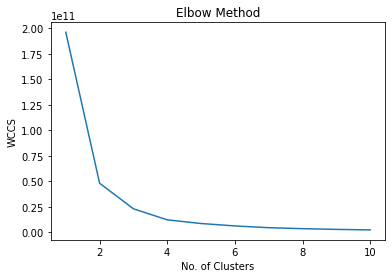

In [50]:
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters = k,random_state = 5)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('No. of Clusters')
plt.ylabel('WCCS')

In [51]:
merged_details

,age,sex,bmi,charges in INR,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,16884.92400,0,1,0,0,0,1
1,18,1,33.770,1725.55230,1,0,0,0,1,0
2,28,1,33.000,4449.46200,3,0,0,0,1,0
3,33,1,22.705,21984.47061,0,0,0,1,0,0
4,32,1,28.880,3866.85520,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,10600.54830,3,0,0,1,0,0
1334,18,0,31.920,2205.98080,0,0,1,0,0,0
1335,18,0,36.850,1629.83350,0,0,0,0,1,0
1336,21,0,25.800,2007.94500,0,0,0,0,0,1


<AxesSubplot:xlabel='age', ylabel='charges in INR'>

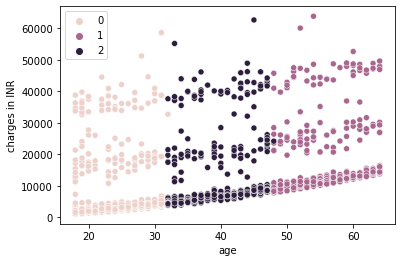

In [52]:
labels = KMeans(n_clusters = 3,random_state = 2)
clusters = labels.fit_predict(merged_details.drop('charges in INR',axis = 1))
sns.scatterplot(x = merged_details['age'],y = merged_details['charges in INR'],hue = clusters)

In [53]:
def clustering(x,tcol,cluster):
    column = list(set(list(x.columns)) - set(list('strength')))
    #column = list(x.columns)
    r = int(len(column)/2)
    if len(column) % 2 == 0:
        r = r
    else:
        r += 1
    f,ax = plt.subplots(r,2,figsize = (15,15))
    a = 0
    for row in range(r):
        for col in range(2):
            if a != len(column):
                ax[row][col].scatter(x[tcol],x[column[a]],c = cluster)
                ax[row][col].set_xlabel(tcol)
                ax[row][col].set_ylabel(column[a])
                a += 1
            
        

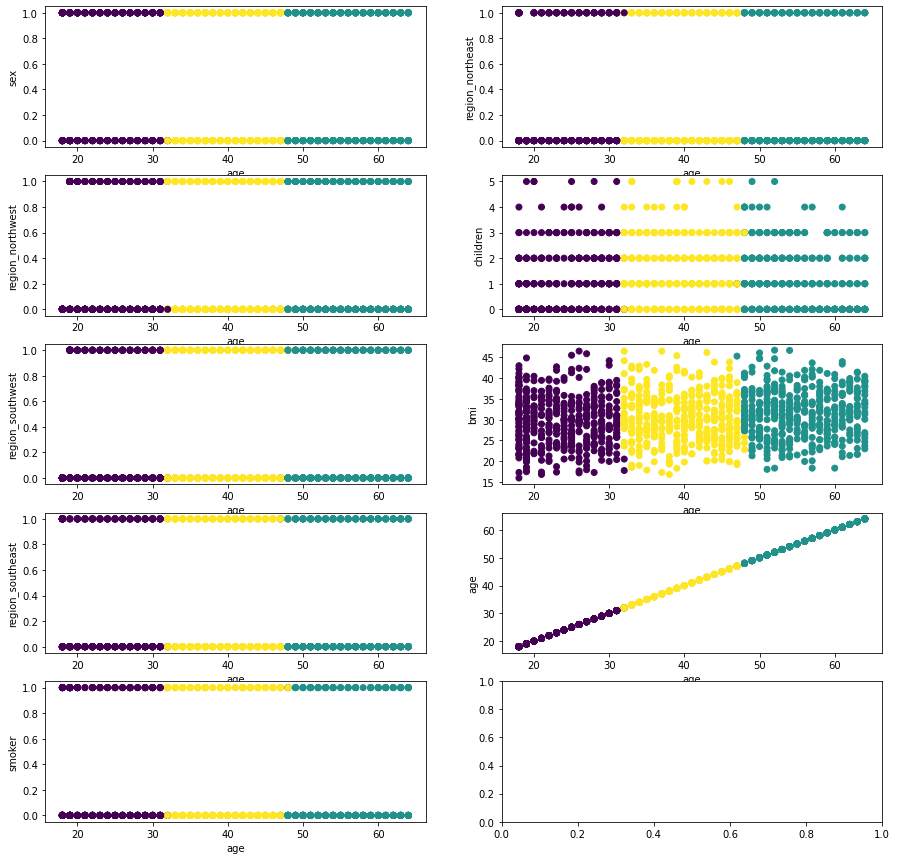

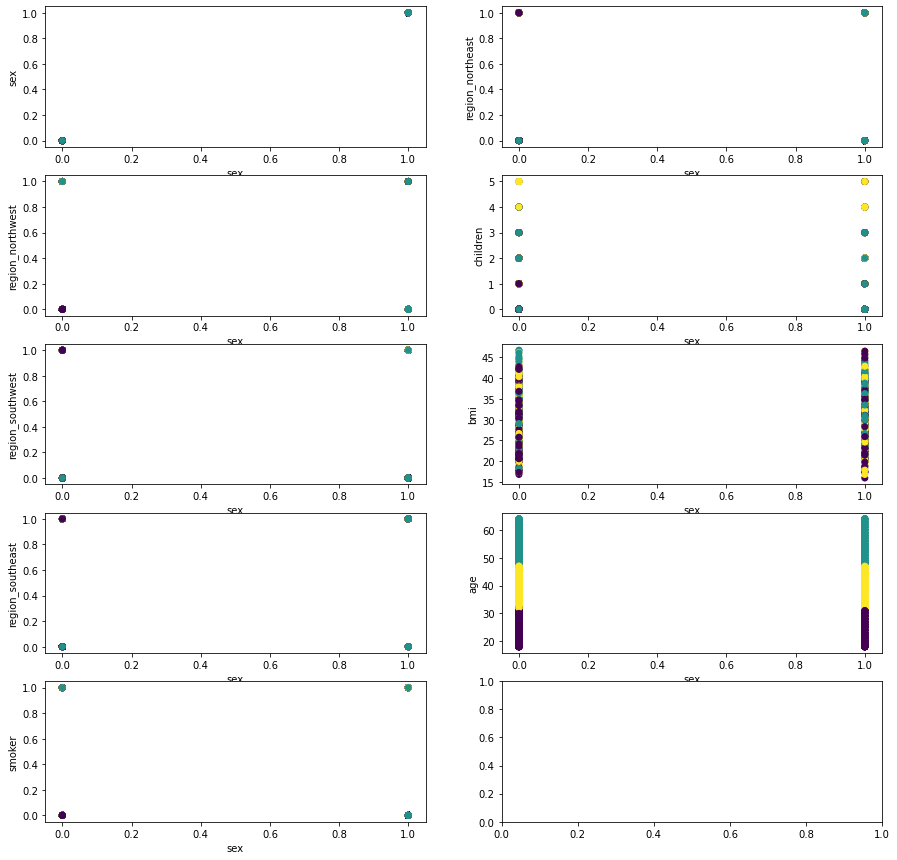

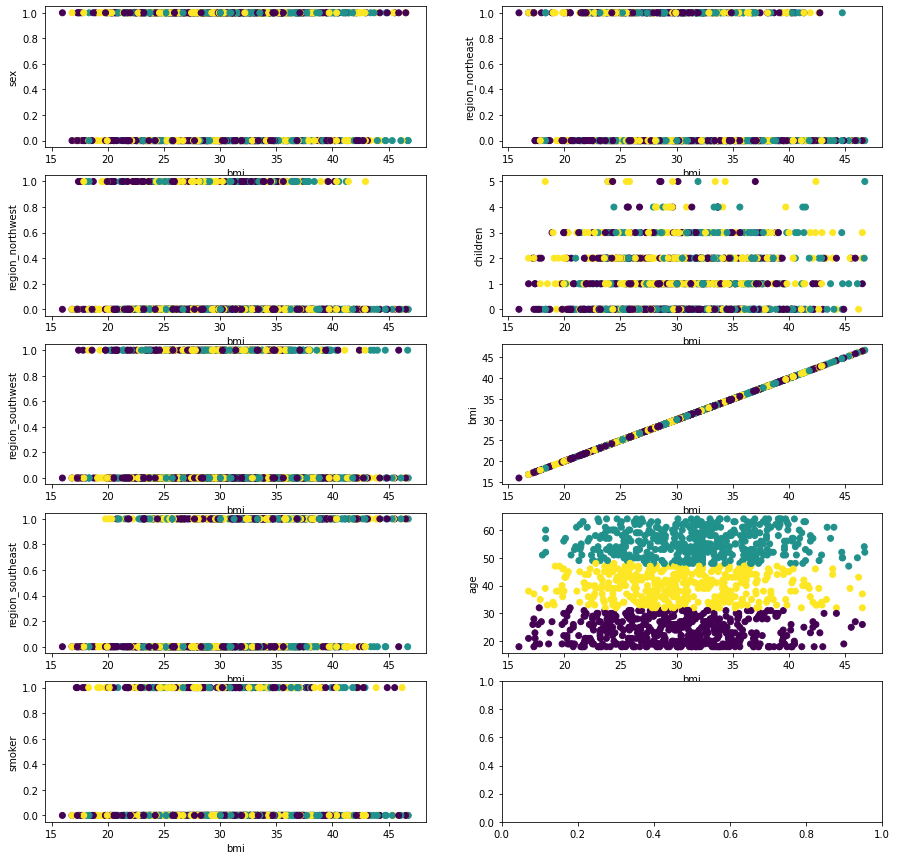

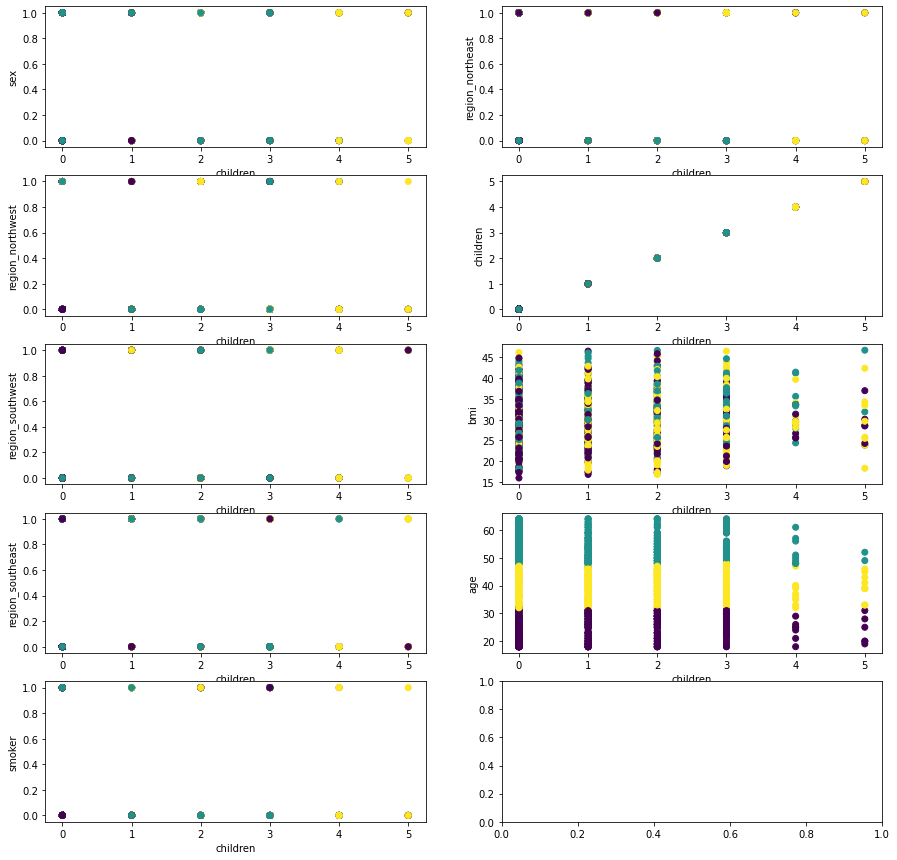

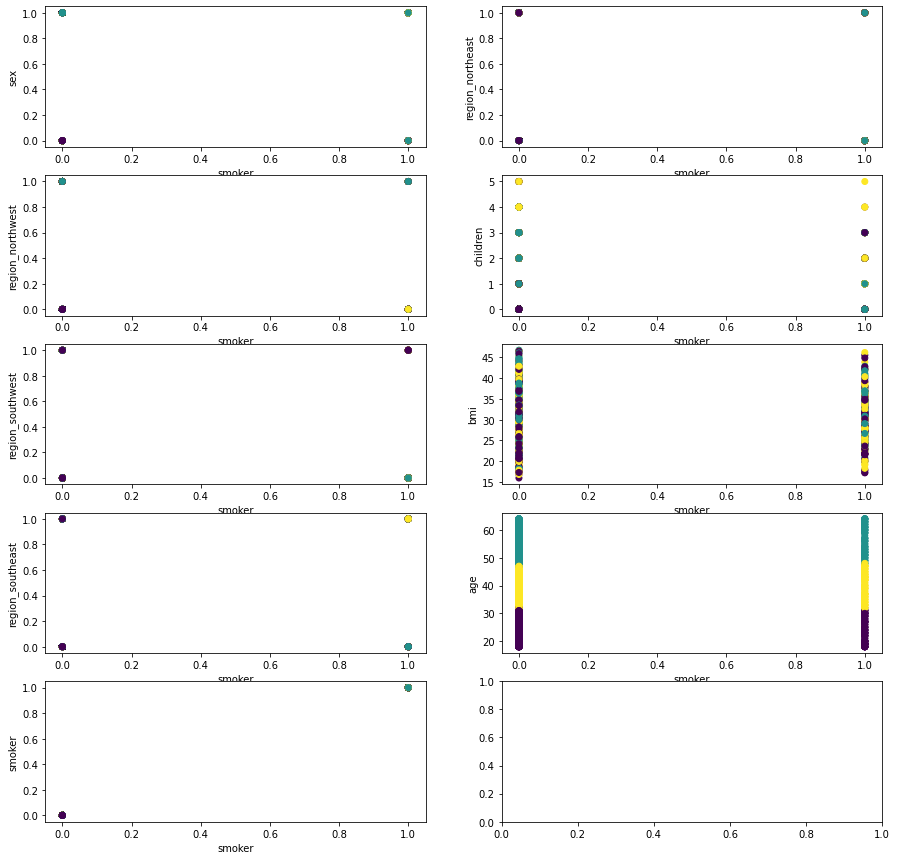

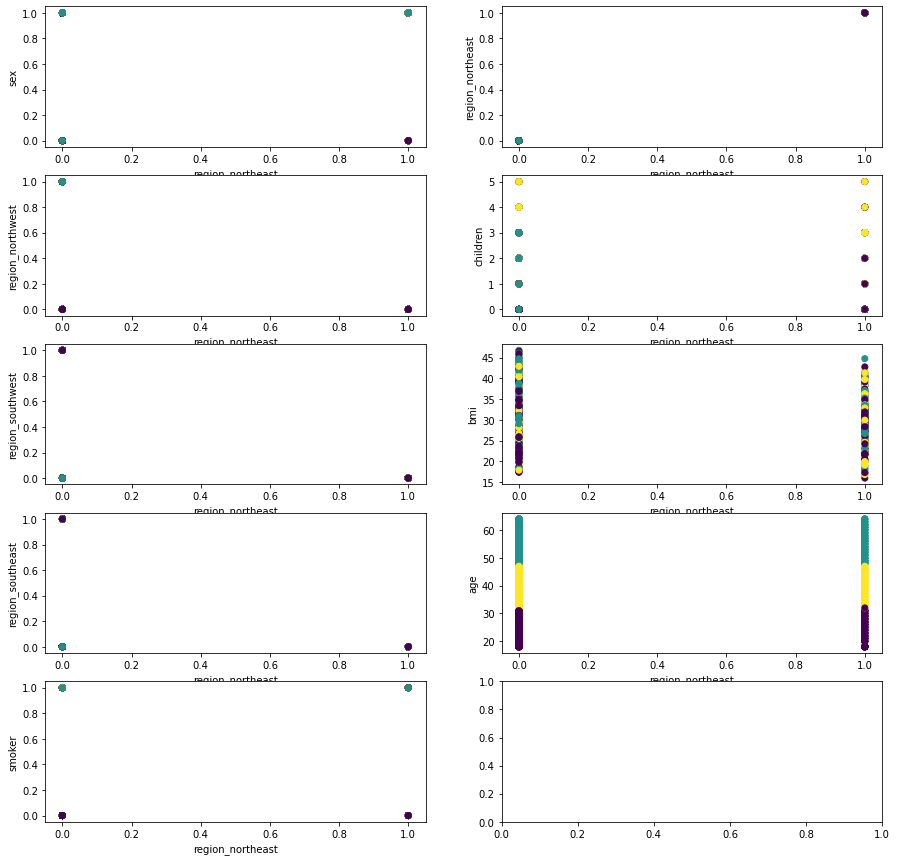

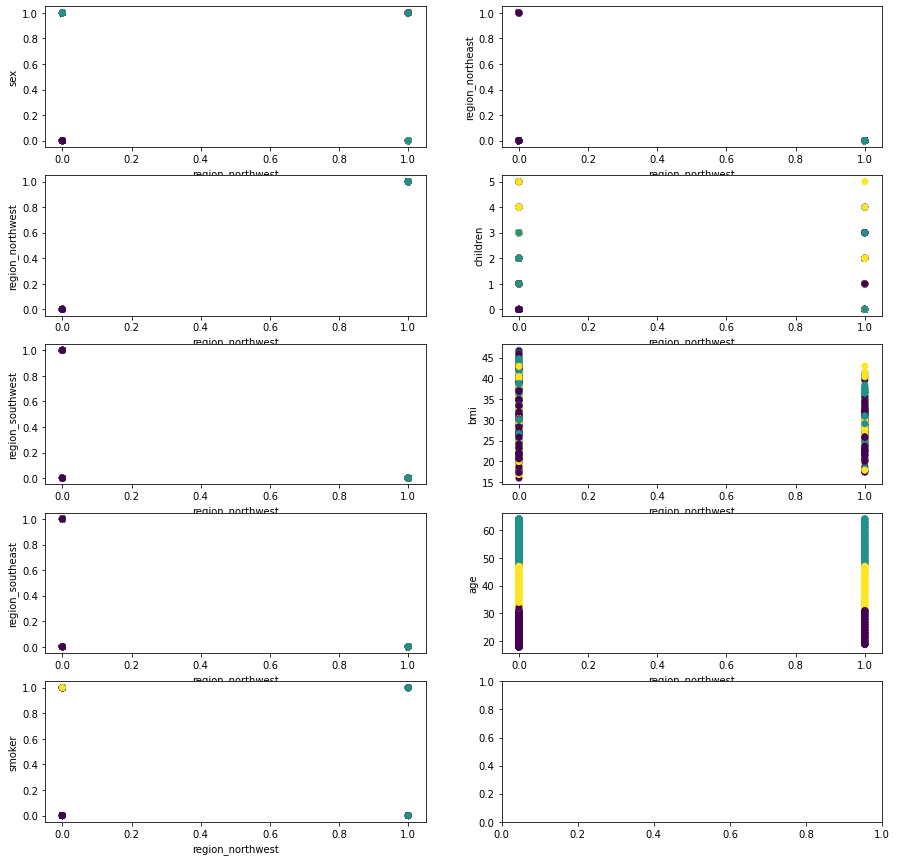

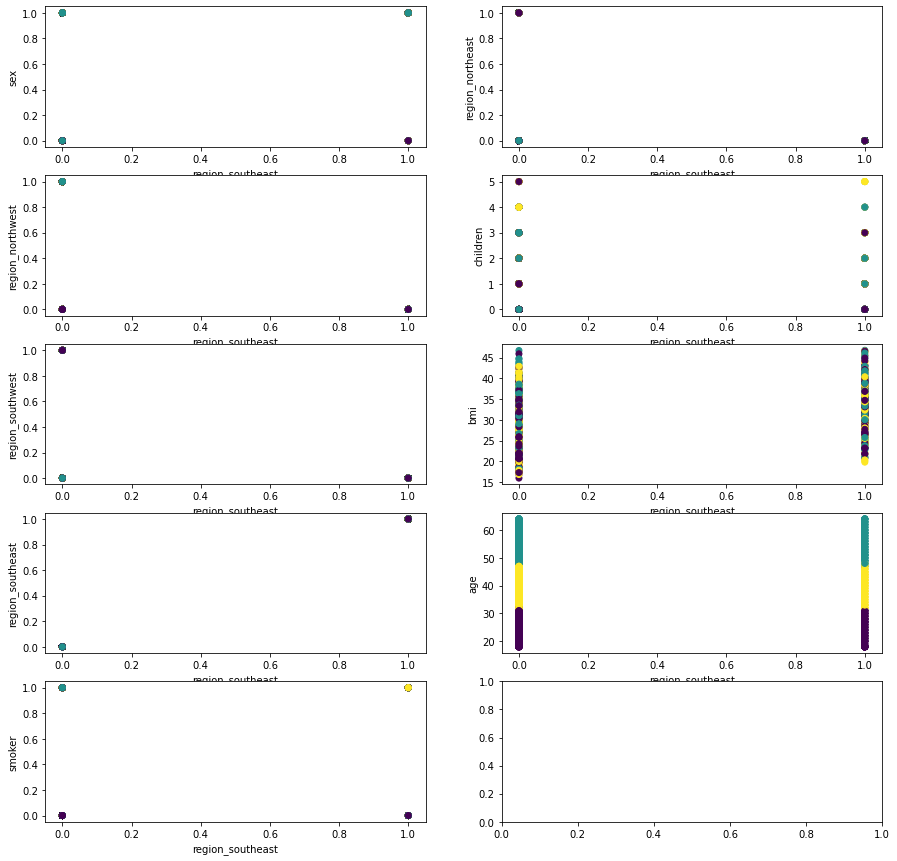

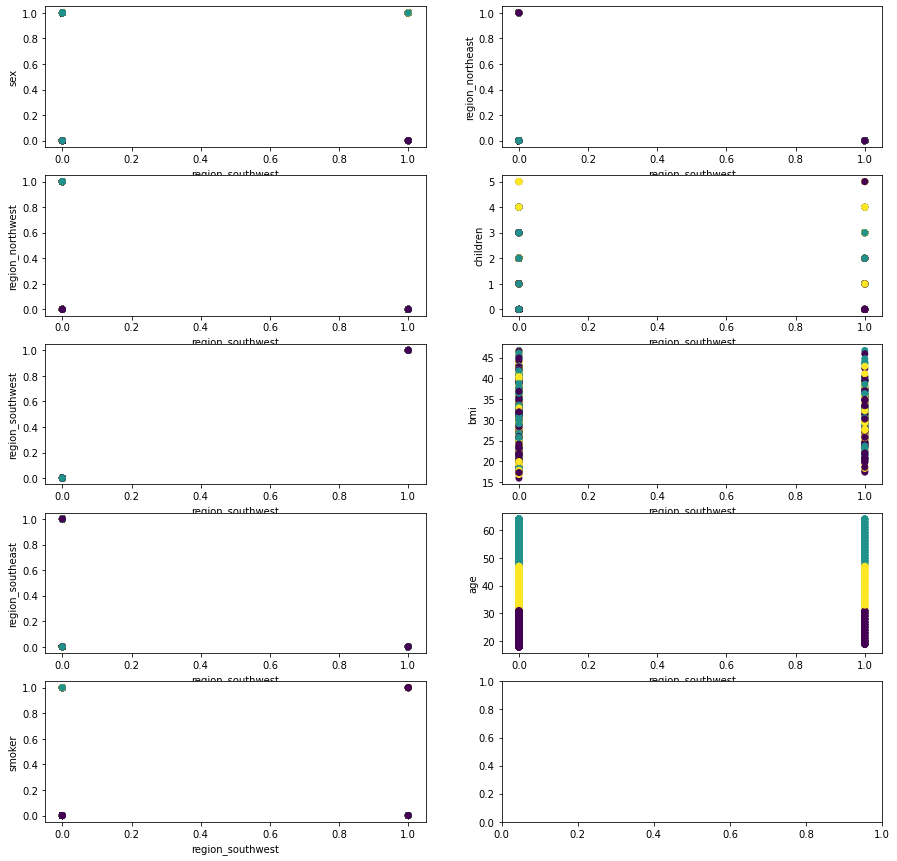

In [54]:
x = merged_details.drop('charges in INR',axis = 1)
for col in x.columns:
    clustering(x,col,clusters)

In [55]:
temp_df1 = merged_details.join(pd.DataFrame(clusters,columns = ['cluster']),how = 'left')

In [56]:
temp_df = new_d1.groupby('cluster')['age'].agg(['mean','median'])

NameError: name 'new_d1' is not defined

In [ ]:
temp_df

In [ ]:
cluster_df = temp_df1.merge(temp_df,on = 'cluster',how = 'left')
cluster_df.head()

### Model Evaluation on Clustered Dataset

In [ ]:
multiple_models(cluster_df,'charges in INR')

In [ ]:
KFoldCV(cluster_df.drop('charges in INR',axis= 1),cluster_df['charges in INR'])

In [ ]:
CV_Post_HPT(cluster_df.drop('charges in INR',axis= 1),cluster_df['charges in INR'])

## Feature Importance

In [ ]:
cluster_df

In [ ]:
x_train,x_test,y_train,y_test = train_and_test_split(cluster_df,'charges in INR')

In [ ]:
x_train

In [ ]:
gradient_boosting = GradientBoostingRegressor()

In [ ]:
gradient_boosting.fit(x_train,y_train)

In [ ]:
feature_importance = gradient_boosting.feature_importances_

In [ ]:
feature_importance

In [ ]:
sorted_index = np.argsort(feature_importance)[::-1]

In [ ]:
x = range(len(feature_importance))

In [57]:
labls = np.array(x_train.columns)[sorted_index]

NameError: name 'x_train' is not defined

In [58]:
plt.barh(x,feature_importance[sorted_index],tick_label = labls)
plt.title('Feature Importance Bar Chart')
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.show()

NameError: name 'feature_importance' is not defined

### Recursive Feature Elimination (RFE)

In [ ]:
df = cluster_df

In [ ]:
rfe = RFE(estimator = GradientBoostingRegressor())

In [ ]:
rfe.fit(new_df.drop('charges in INR',axis = 1),new_df['charges in INR'])

In [ ]:
rfe.support_

In [ ]:
cluster_df.columns

#### Analysis:
- Age, Bmi, Children, Smoker are importance features as we get from RFE. 

In [ ]:
final_df = cluster_df[['age','bmi','children','smoker','charges in INR']]

In [ ]:
CV_Post_HPT(final_df.drop('charges in INR',axis = 1),final_df['charges in INR'])

In [ ]:
KFoldCV(final_df.drop('charges in INR',axis = 1),final_df['charges in INR'])

In [ ]:
multiple_models(final_df.drop('charges in INR',axis = 1),final_df['charges in INR'])

## Learning Curve

In [ ]:
def Generate_Learning_Curve(model_name,estimator,x,y):
    train_size,train_score,test_score = learning_curve(estimator,x,y,cv = 10)
    train_score_mean = np.mean(train_score,axis = 1)
    test_score_mean = np.mean(test_score,axis = 1)
    plt.plot(train_size,train_score_mean,c = 'Blue')
    plt.plot(train_size,test_score_mean,c = 'Red')
    plt.xlabel('Samples')
    plt.ylabel('Scores')
    plt.title('Learning Curve for '+ model_name)
    plt.legend(('Training Accuracy','Testing Accuracy'))
    

In [ ]:
model_name = [LinearRegression(),DecisionTreeRegressor(),Lasso(),Ridge(),KNeighborsRegressor(),SVR(),RandomForestRegressor(),AdaBoostRegressor(),GradientBoostingRegressor(),XGBRegressor()]
for i,model in enumerate(model_name):
    fg = plt.figure(figsize = (6,3))
    ax = fig.add_subplot(5,2,i+1)
    Generate_Learning_Curve(type(model).__name__,model,cluster_df.drop('charges in INR',axis = 1),cluster_df['charges in INR'])
        

#### Analysis:
- Gradient Boosting Regressor is showing best results for Learning Curve as compared to other model with a Training Accuracy of approx 90% and testing accuracy of approx 85%.

## Model Prediction on Unseen Data

In [ ]:
x_train,x_test,y_train,y_test = train_and_test_split(cluster_df,'charges in INR',testsize = 0.2)
model = DecisionTreeRegressor()
model.fit(x_train,y_train)

In [ ]:
x_train.head()

In [ ]:
test_data = [[19,0,20.600,0,0,0,0,0,1,2,23.458774,23.0]]

In [ ]:
model.predict(pd.DataFrame(test_data,columns = x_train.columns))